<a href="https://colab.research.google.com/github/Kaif974/trader-sentiment-analysis/blob/main/Kaif_Hyperliquid_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# 1. Load the datasets ---
fear_greed_df = pd.read_csv('/content/fear_greed_index.csv')
historical_df = pd.read_csv('/content/historical_data.csv')

In [33]:
print("--- Initial DataFrames Head ---")
print("Fear Greed Index DataFrame:")
print(fear_greed_df.head())
print("\nHistorical Data DataFrame:")
print(historical_df.head())

--- Initial DataFrames Head ---
Fear Greed Index DataFrame:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Historical Data DataFrame:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 202

In [21]:
#2. Data Preprocessing and Merging
# Convert date formats
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date']).dt.date
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
historical_df['trade_date'] = historical_df['Timestamp IST'].dt.date
historical_df['trade_time'] = historical_df['Timestamp IST'].dt.time
# Rename leverage column if necessary
if 'leverageUsed' in historical_df.columns:
    historical_df.rename(columns={'leverageUsed': 'Leverage'}, inplace=True)

merged_df = pd.merge(historical_df, fear_greed_df, left_on='trade_date', right_on='date', how='inner')

print("\n--- Merged DataFrame Head ---")
print(merged_df.head())
print("\n--- Merged DataFrame Info ---")
merged_df.info()


--- Merged DataFrame Head ---
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ... Crossed       Fee      Trade ID     Timest


--- Average Closed PnL by Market Sentiment ---
  classification  Closed PnL
0   Extreme Fear   34.537862
2           Fear   54.290400
4        Neutral   34.307718
3          Greed   42.743559
1  Extreme Greed   67.892861


/tmp/ipython-input-22-310377869.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Closed PnL', data=avg_pnl_by_sentiment, palette='viridis', order=sentiment_order)


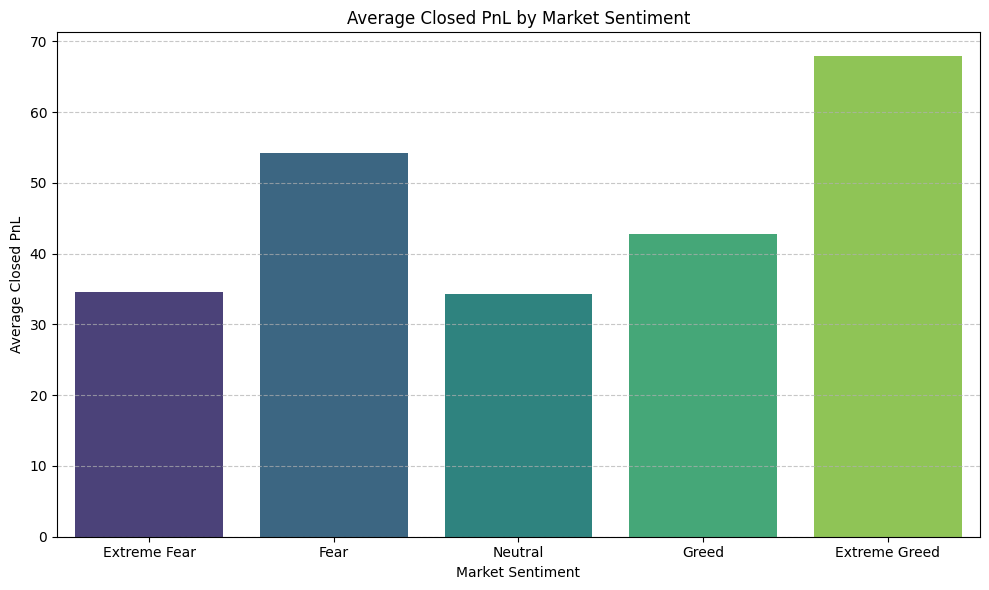

In [22]:
# --- 3. Average Closed PnL by Market Sentiment ---
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()
avg_pnl_by_sentiment['classification'] = pd.Categorical(avg_pnl_by_sentiment['classification'], categories=sentiment_order, ordered=True)
avg_pnl_by_sentiment = avg_pnl_by_sentiment.sort_values('classification')

print("\n--- Average Closed PnL by Market Sentiment ---")
print(avg_pnl_by_sentiment)

plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Closed PnL', data=avg_pnl_by_sentiment, palette='viridis', order=sentiment_order)
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('average_pnl_by_sentiment.png')
plt.show()



/tmp/ipython-input-23-147081859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Closed PnL', data=merged_df, order=sentiment_order, palette='viridis')


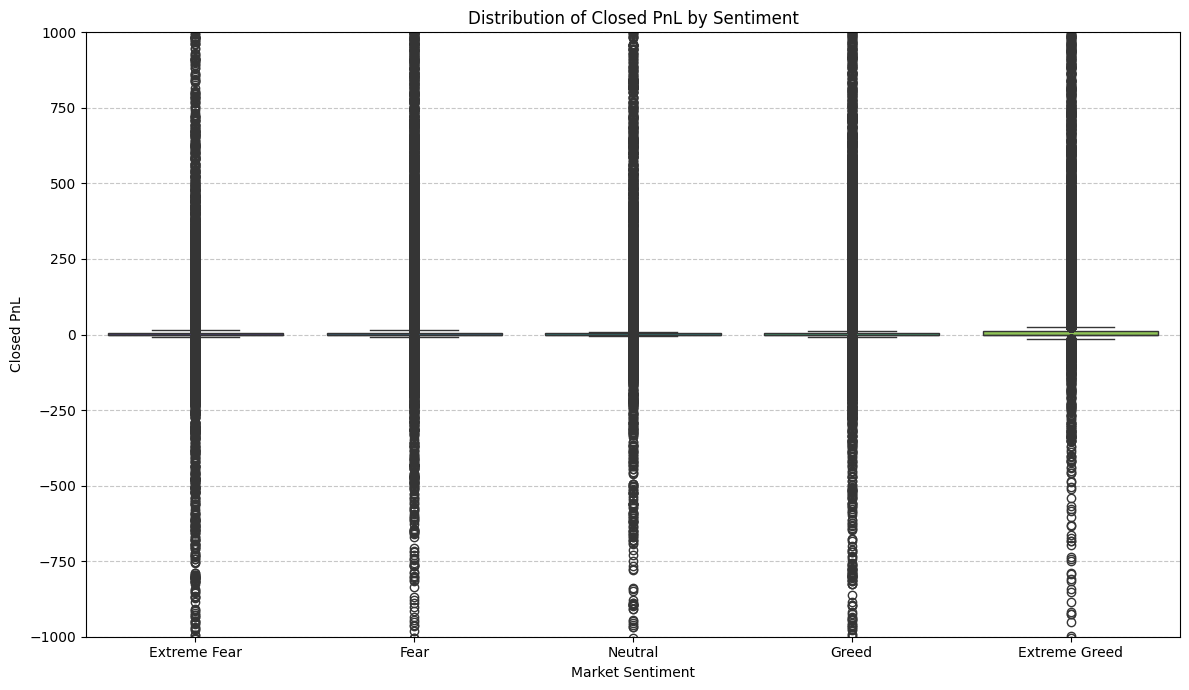

In [23]:
# --- 4. Distribution of Closed PnL by Market Sentiment ---
plt.figure(figsize=(12, 7))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df, order=sentiment_order, palette='viridis')
plt.title('Distribution of Closed PnL by Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.ylim(-1000, 1000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('pnl_distribution_by_sentiment.png')
plt.show()


In [24]:
# --- 5. Number of Trades by Market Sentiment ---
trades_by_sentiment = merged_df['classification'].value_counts().reindex(sentiment_order)
print("\n--- Number of Trades by Market Sentiment ---")
print(trades_by_sentiment)



--- Number of Trades by Market Sentiment ---
classification
Extreme Fear     21400
Fear             61837
Neutral          37686
Greed            50303
Extreme Greed    39992
Name: count, dtype: int64



--- Correlation between FGI Value and Closed PnL: 0.01 ---


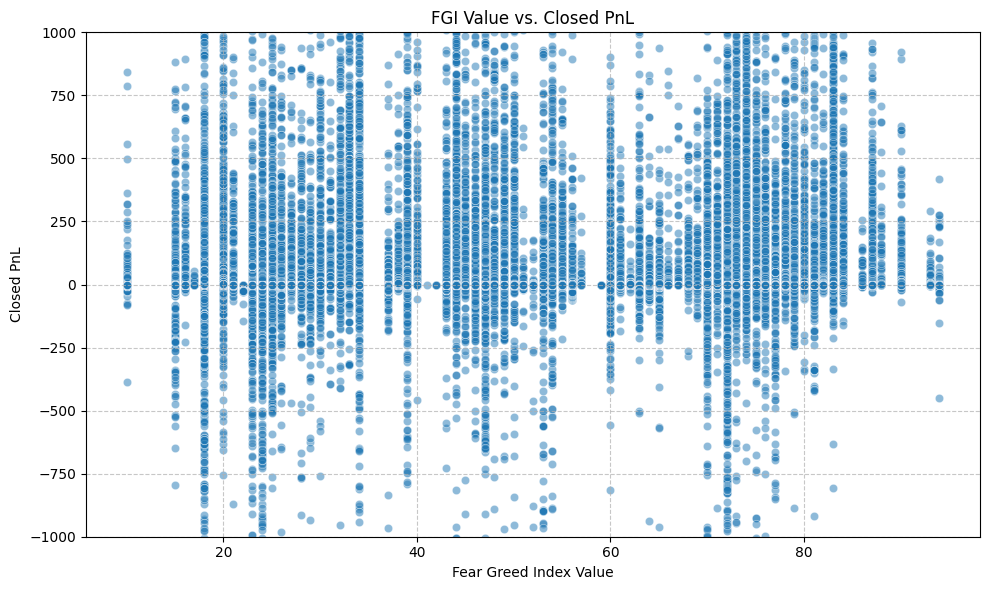

In [25]:
# --- 6. Correlation between Fear Greed Index and Closed PnL ---
correlation = merged_df['value'].corr(merged_df['Closed PnL'])
print(f"\n--- Correlation between FGI Value and Closed PnL: {correlation:.2f} ---")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='value', y='Closed PnL', data=merged_df, alpha=0.5)
plt.title('FGI Value vs. Closed PnL')
plt.xlabel('Fear Greed Index Value')
plt.ylabel('Closed PnL')
plt.ylim(-1000, 1000)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('fgi_value_vs_pnl_scatter.png')
plt.show()

In [26]:
# --- 7. Top 10 Accounts by Total Closed PnL ---
top_n = 10
top_accounts = merged_df.groupby('Account')['Closed PnL'].sum().nlargest(top_n).reset_index()
print(f"\n--- Top {top_n} Accounts by Total Closed PnL ---")
print(top_accounts)



--- Top 10 Accounts by Total Closed PnL ---
                                      Account    Closed PnL
0  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  2.143383e+06
1  0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06
2  0xbaaaf6571ab7d571043ff1e313a9609a10637864  9.401638e+05
3  0x513b8629fe877bb581bf244e326a047b249c4ff1  8.404226e+05
4  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  8.360806e+05
5  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  6.777471e+05
6  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  4.293556e+05
7  0x430f09841d65beb3f27765503d0f850b8bce7713  4.165419e+05
8  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  3.790954e+05
9  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  3.605395e+05



--- Avg Closed PnL by Sentiment and Side ---
Side                  BUY        SELL
classification                       
Extreme Fear    34.114627   34.980106
Fear            63.927104   45.049641
Neutral         29.227429   39.456408
Greed           25.002302   59.691091
Extreme Greed   10.498927  114.584643


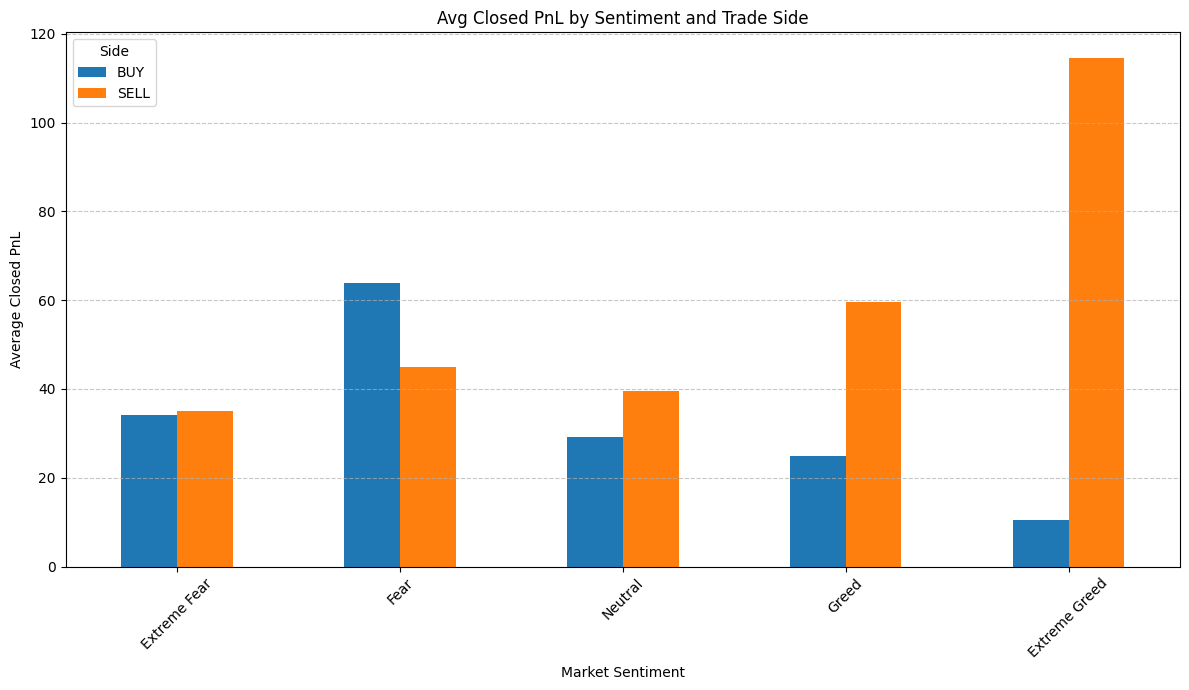

In [27]:
# --- 8. Avg PnL by Sentiment and Trade Side ---
pnl_by_sentiment_side = merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()
pnl_by_sentiment_side = pnl_by_sentiment_side.reindex(sentiment_order)

print("\n--- Avg Closed PnL by Sentiment and Side ---")
print(pnl_by_sentiment_side)

plt.figure(figsize=(12, 7))
pnl_by_sentiment_side.plot(kind='bar', figsize=(12, 7), ax=plt.gca())
plt.title('Avg Closed PnL by Sentiment and Trade Side')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('pnl_by_sentiment_and_side.png')
plt.show()


In [28]:
# --- 9. Leverage Analysis by Sentiment ---
if 'Leverage' in merged_df.columns:
    avg_leverage_by_sentiment = merged_df.groupby('classification')['Leverage'].mean().reindex(sentiment_order)
    print("\n--- Average Leverage by Market Sentiment ---")
    print(avg_leverage_by_sentiment)

    plt.figure(figsize=(10, 6))
    avg_leverage_by_sentiment.plot(kind='bar', color='teal')
    plt.title('Average Leverage by Market Sentiment')
    plt.xlabel('Market Sentiment')
    plt.ylabel('Average Leverage')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('avg_leverage_by_sentiment.png')
    plt.show()
else:
    print("\n--- Leverage column not found. Skipping leverage analysis. ---")



--- Leverage column not found. Skipping leverage analysis. ---


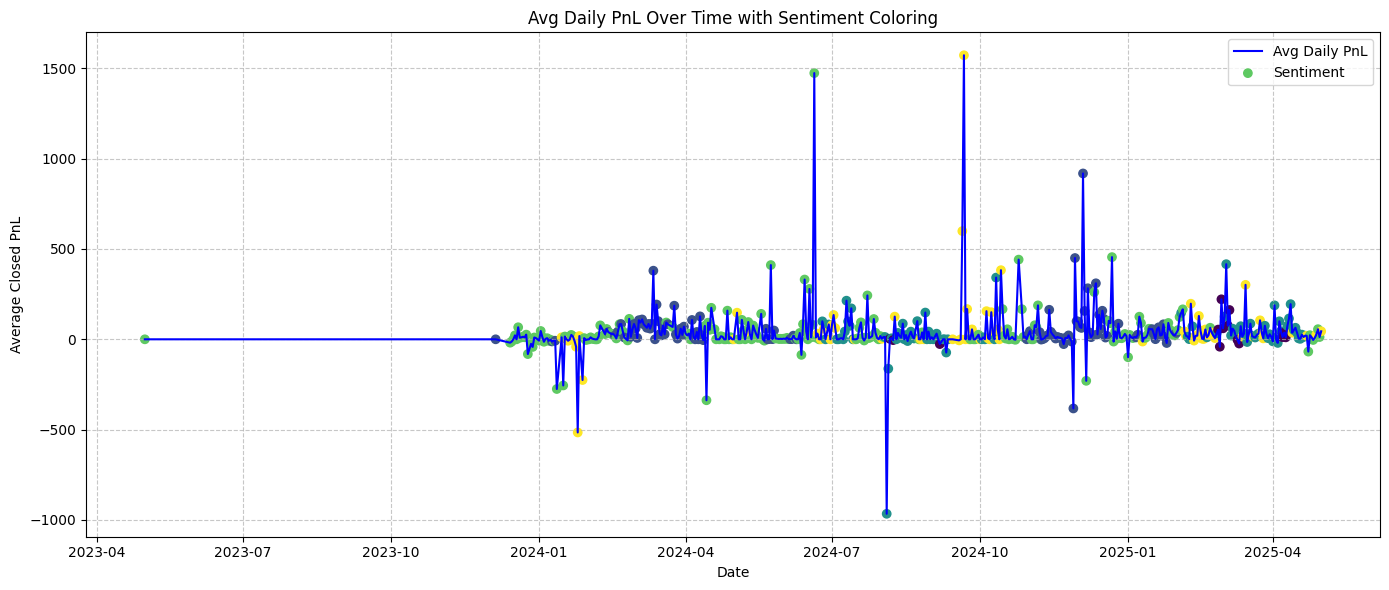

In [29]:
# --- 10. Time Series of Avg PnL with Sentiment Overlay ---
daily_avg_pnl = merged_df.groupby('trade_date')['Closed PnL'].mean().reset_index()
daily_sentiment = fear_greed_df.set_index('date').loc[daily_avg_pnl['trade_date']].reset_index()

plt.figure(figsize=(14, 6))
plt.plot(daily_avg_pnl['trade_date'], daily_avg_pnl['Closed PnL'], label='Avg Daily PnL', color='blue')
plt.scatter(daily_avg_pnl['trade_date'], daily_avg_pnl['Closed PnL'], c=daily_sentiment['classification'].astype('category').cat.codes, cmap='viridis', label='Sentiment')
plt.title('Avg Daily PnL Over Time with Sentiment Coloring')
plt.xlabel('Date')
plt.ylabel('Average Closed PnL')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('daily_pnl_with_sentiment.png')
plt.legend()
plt.show()

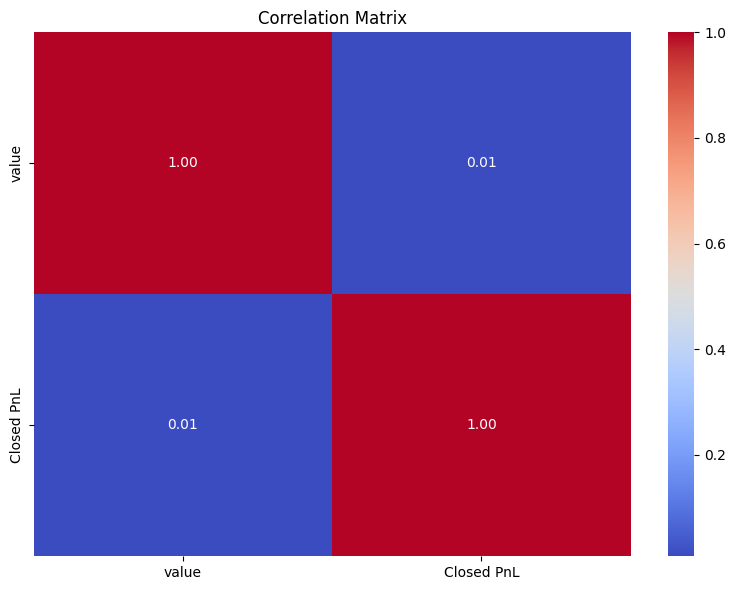

In [30]:
# --- Optional: Correlation Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(merged_df[['value', 'Closed PnL'] + (["Leverage"] if 'Leverage' in merged_df.columns else [])].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

In [32]:
# --- Save Analyzed Data ---
merged_df.to_csv('merged_data.csv', index=False)
avg_pnl_by_sentiment.to_csv('avg_pnl_by_sentiment.csv', index=False)
trades_by_sentiment.to_csv('trades_by_sentiment.csv')
pnl_by_sentiment_side.to_csv('pnl_by_sentiment_side.csv')
top_accounts.to_csv('top_accounts.csv', index=False)
if 'Leverage' in merged_df.columns:
    avg_leverage_by_sentiment.to_csv('avg_leverage_by_sentiment.csv')
daily_avg_pnl.to_csv('daily_avg_pnl.csv', index=False)
daily_sentiment.to_csv('daily_sentiment.csv', index=False)